# Graphene without potential

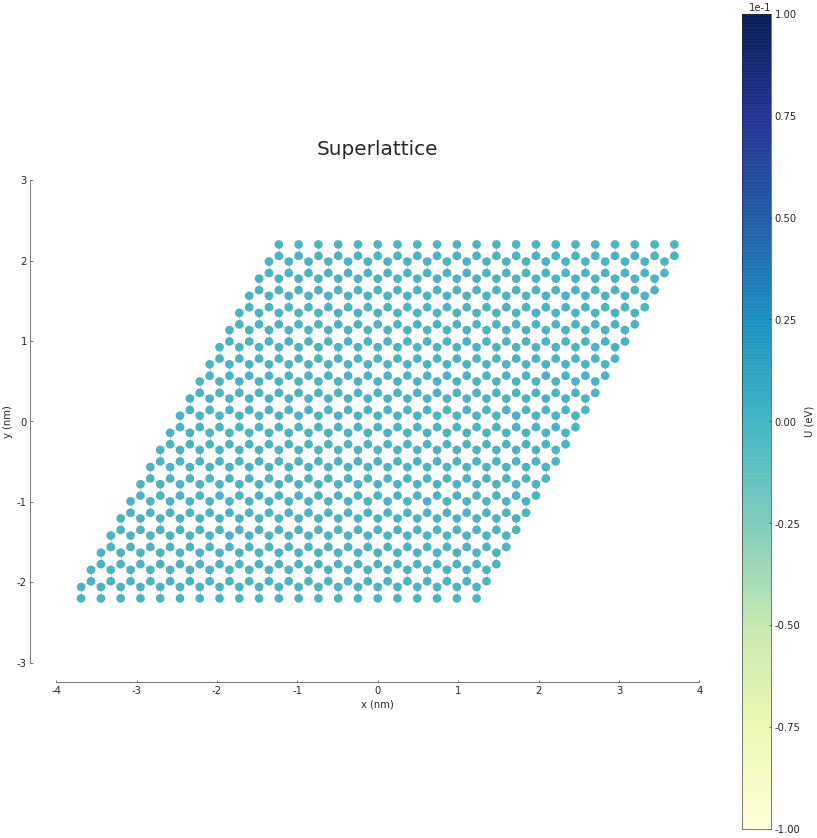

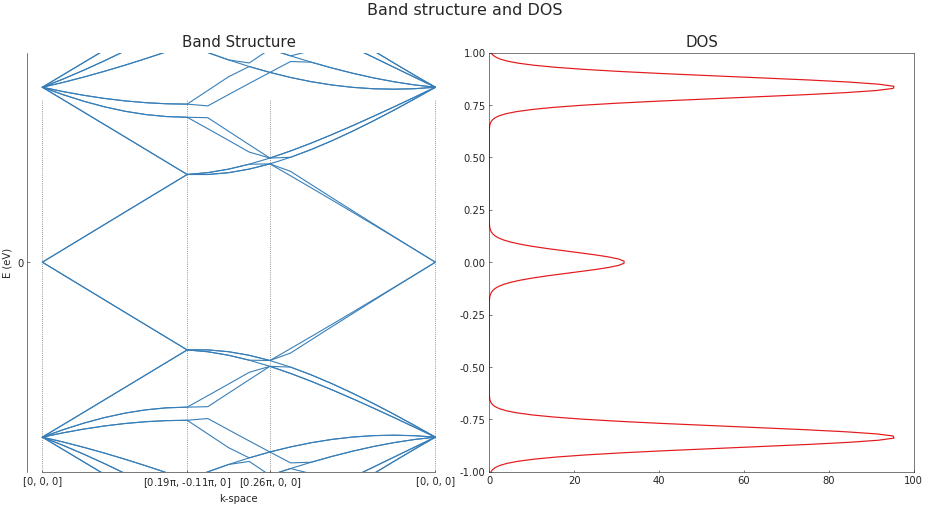

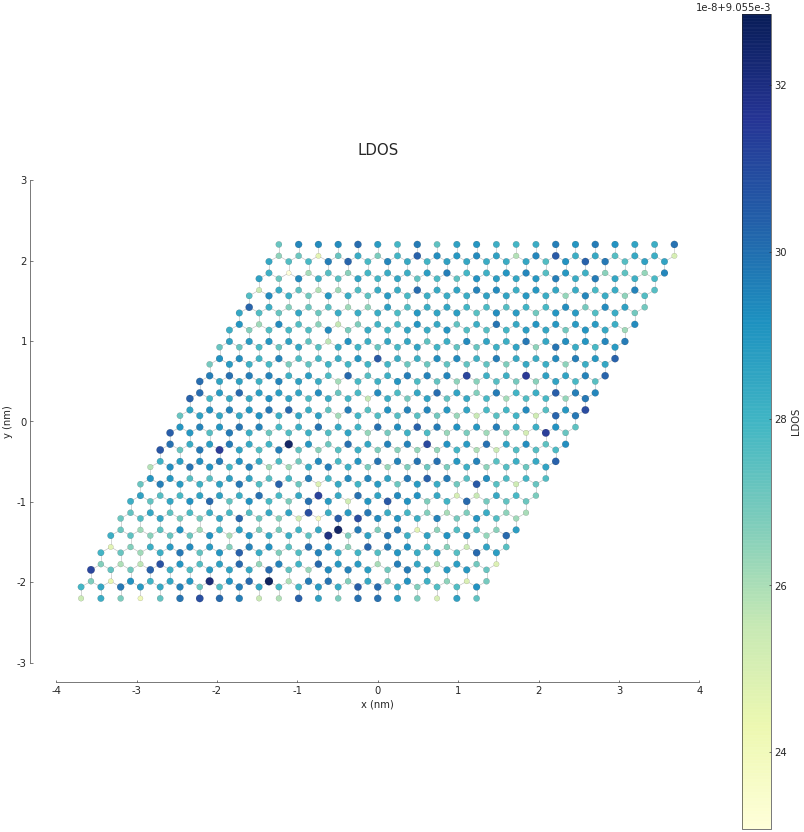

In [1]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from pybinding.repository import graphene
from math import pi, sqrt
pb.pltutils.use_style()
%matplotlib inline


##Use formula to find reciprocal vectors
def reci(A1,A2):
    c = np.array([0,0,1])
    V = abs(np.dot(np.cross(A1,A2),c))
    B1 = 2*np.pi*np.cross(A2,c)/V
    B2 = 2*np.pi*np.cross(c,A1)/V
    return [B1,B2]
    
##Number of graphenes
a=21
b=a


#@pb.onsite_energy_modifier
#def potential(energy, x, y):
#        energy[np.tan(np.pi/3)*x-y<-1] = 0.3
#        energy[np.tan(np.pi/3)*x-y>1] = -0.3
#        energy[(np.tan(np.pi/3)*x-y>-1)&(np.tan(np.pi/3)*x-y<1)] = 0
#        return energy

model = pb.Model(graphene.monolayer(),
                 pb.primitive(a1=a, a2=b),
                 pb.translational_symmetry(a1=a*graphene.a, a2=b*graphene.a),
                 #potential
                )

plt.figure(figsize=(15,15))
plt.title('Superlattice',fontsize=20)
model.onsite_map.plot(num_periods=0)
pb.pltutils.colorbar(label="U (eV)")

## Gamma, M, K path in brillouin zone
A1,A2 = model.lattice.vectors
A1,A2 = A1*a,A2*b
B1,B2 = reci(A1,A2)
BB = B1+B2
KK = (B1+BB)*(1/3)
MM = B1*0.5
gamma = np.zeros(3,dtype=float)


f, axs = plt.subplots(1,2,figsize=(13,7))
f.suptitle("Band structure and DOS", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.88)

#Band Structure
ax1 = plt.subplot(121)
ax1.set_title('Band Structure',fontsize=15)
solver = pb.solver.lapack(model)
bands = solver.calc_bands(gamma,MM,KK,gamma)
bands.plot()
ylim=1
plt.ylim(-ylim, ylim)


#DOS
ax2 = plt.subplot(122)
ax2.set_title('DOS',fontsize=15)
solver = pb.solver.lapack(model)
dos = solver.calc_dos(energies=np.linspace(-ylim, ylim, 200), broadening=0.05)  # [eV]
plt.plot(dos.data, np.linspace(-ylim,ylim,200))

#LDOS
plt.figure(figsize=(15,15))
plt.title('LDOS',fontsize=15)
solver = pb.solver.lapack(model)
ldos_map = solver.calc_spatial_ldos(energy=0, broadening=0.2)  # [eV]
ldos_map.plot(num_periods=0)
pb.pltutils.colorbar(label="LDOS")

# Brillouin zone

2681


[]

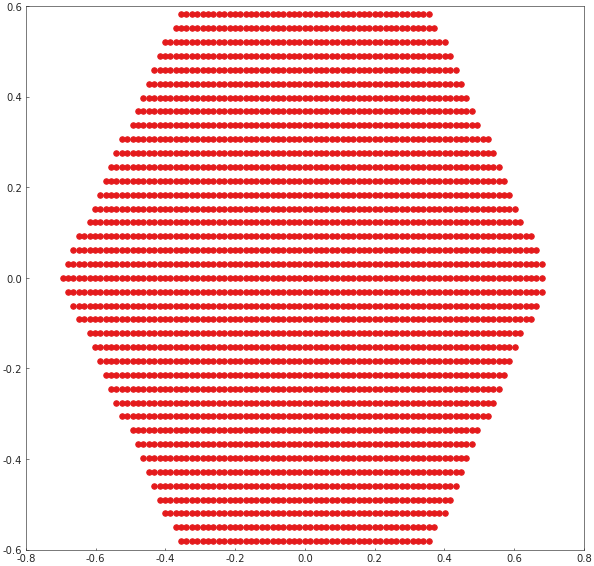

In [2]:
##Draw Brillouin zone using reference code
##Using reference code for more accurate results

a1 = a*graphene.a
b1=2*np.pi/(a1) #Reciprocal lattice vector

nn = 20#ncrease this value to increase the sampling of K-points in BZ
pp = 4*nn

nnx = int(round(pp*2/np.sqrt(3)))
ddnx = (2*b1/np.sqrt(3))/nnx

nny = int(pp)
ddny = b1/nny;

kx1 = np.linspace((-b1/np.sqrt(3))-ddnx/2,(b1/np.sqrt(3))+ddnx/2,nnx+1)
ky1 = np.linspace(-b1-ddny/2,b1+ddny/2,nny+1)

bb = b1
kk1 = 0

temp1 = np.zeros((round((nnx*nny)*(3/8)),2))
for ii in range (0,nnx):
    for jj in range (0,nny):
        kx = kx1[ii]
        ky = ky1[jj]
        if ((np.sqrt(3)*kx-b1)<=ky and (ky<=(-np.sqrt(3)*kx+b1)   # this condition make the hexagonal shape
            and (np.sqrt(3)*kx+b1)>=ky) and (ky>=-np.sqrt(3)*kx-b1)
            and (-b1/2<=ky) and (ky<=b1/2)):
            kk1 =kk1+1
            temp1[kk1,0] = kx
            temp1[kk1,1] = ky    
            
print(kk1)
#print (temp1)
sample = temp1[0:kk1,:] # for nn = 2: 21, nn = 3: 
#print (temp1.shape[0])  # print the number of column
#print (sample)
kx=sample[:,0]
ky=sample[:,1]

plt.figure(figsize=(10,10))
plt.scatter(kx,ky,s=30)
plt.plot()

# DOS with more k-point

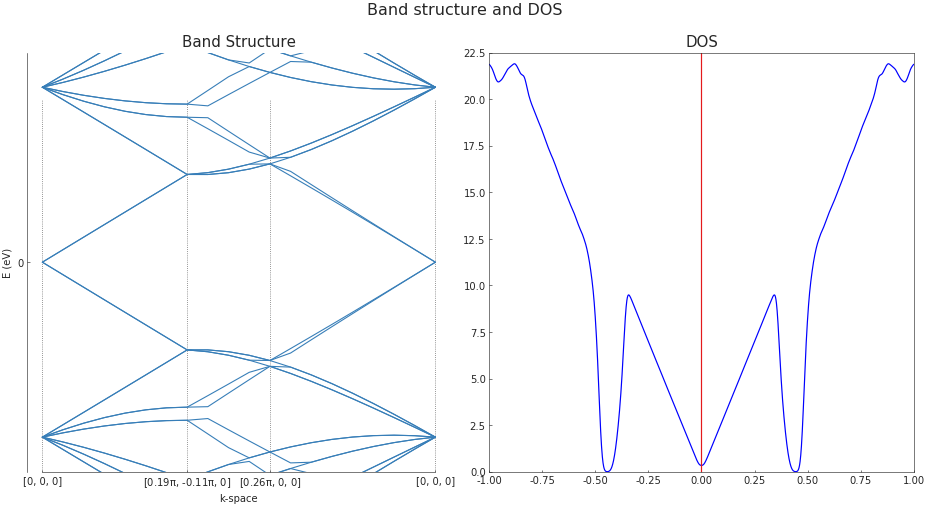

In [3]:
##DOS (using brillouing zone)

E = 1

f, axs = plt.subplots(1,2,figsize=(13,7))
f.suptitle("Band structure and DOS", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.88)

#Band Structure
ax1 = plt.subplot(121)
ax1.set_title('Band Structure',fontsize=15)
solver = pb.solver.lapack(model)
bands = solver.calc_bands(gamma,MM,KK,gamma)
bands.plot()
ylim=1
plt.ylim(-ylim, ylim)

#DOS
ax2 = plt.subplot(122)
ax2.set_title('DOS',fontsize=15)
solver.set_wave_vector([0,0])
lapack_dos = solver.calc_dos(np.linspace(-E, E, 2500), broadening=0.01)
data2=lapack_dos.data
for i in range(0,kk1):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-E, E, 2500), broadening=0.01)
    data2+=lapack_dos.data
data2=data2/(kk1+1)

plt.plot(np.linspace(-E, E, 2500),data2,label='position: [4.5,3]',color='b')
#plt.plot(data2, np.linspace(-ylim,ylim,2500))
plt.axvline(0)


# Graphene with potential 

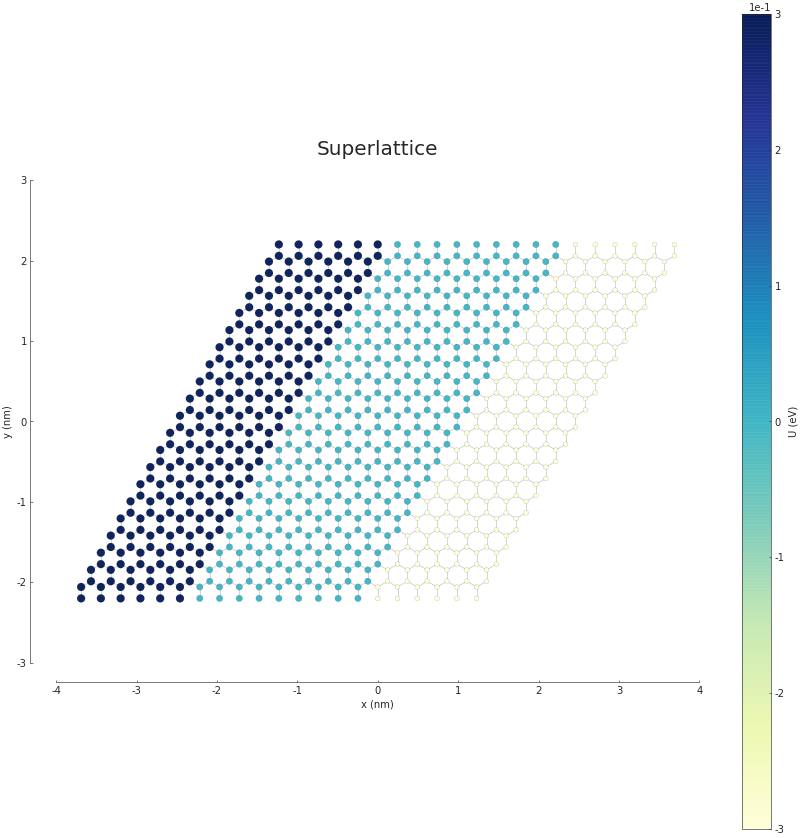

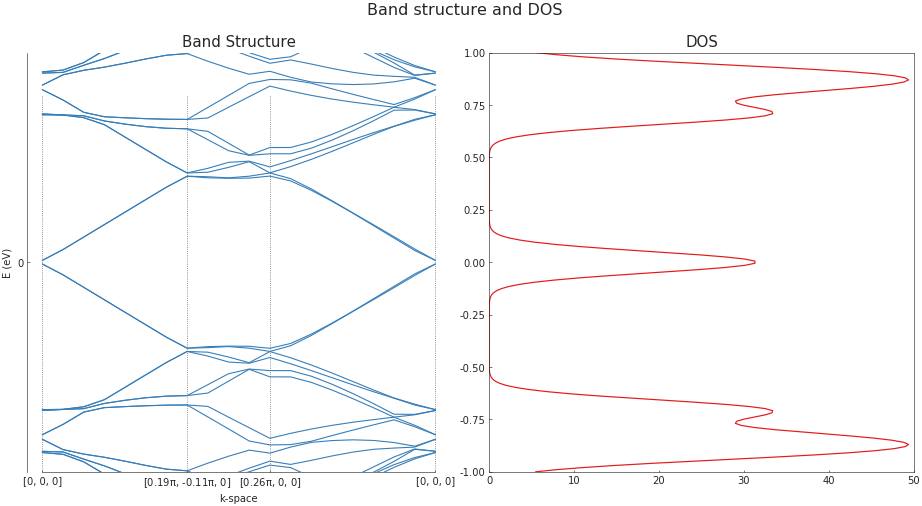

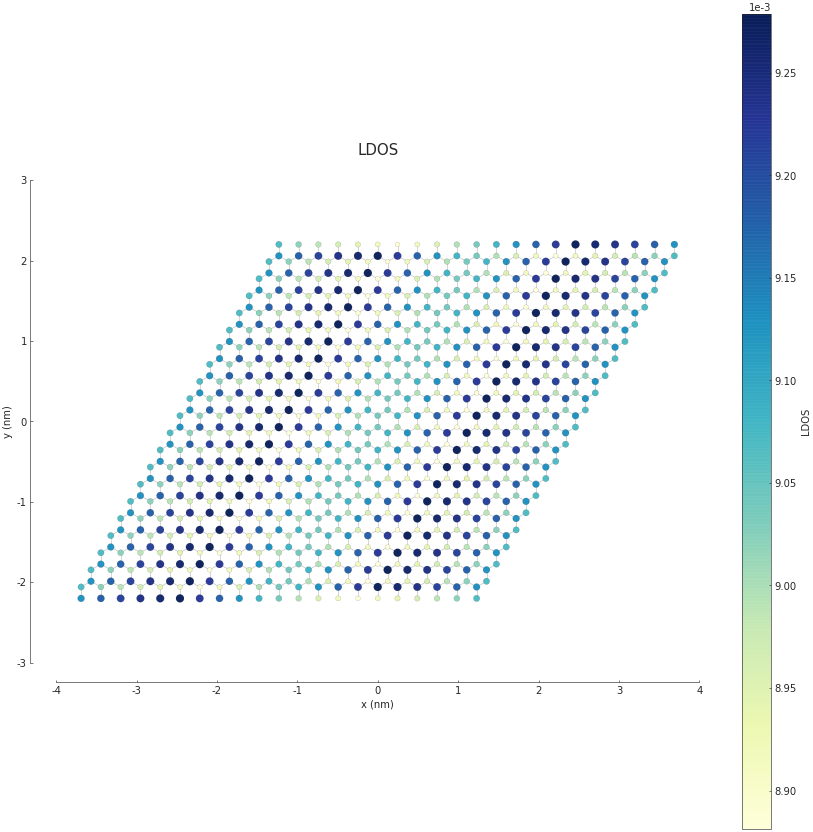

In [4]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from pybinding.repository import graphene
from math import pi, sqrt
pb.pltutils.use_style()
%matplotlib inline

##Use formula to find reciprocal vectors
def reci(A1,A2):
    c = np.array([0,0,1])
    V = abs(np.dot(np.cross(A1,A2),c))
    B1 = 2*np.pi*np.cross(A2,c)/V
    B2 = 2*np.pi*np.cross(c,A1)/V
    return [B1,B2]
    
##Number of graphenes
a=21
b=a


@pb.onsite_energy_modifier
def potential(energy, x, y):
        energy[np.tan(np.pi/3)*x-y<-2] = 0.3
        energy[np.tan(np.pi/3)*x-y>2] = -0.3
        energy[(np.tan(np.pi/3)*x-y>-2)&(np.tan(np.pi/3)*x-y<2)] = 0
        return energy

model = pb.Model(graphene.monolayer(),
                 pb.primitive(a1=a, a2=b),
                 pb.translational_symmetry(a1=a*graphene.a, a2=b*graphene.a),
                 potential
                )

plt.figure(figsize=(15,15))
plt.title('Superlattice',fontsize=20)
model.onsite_map.plot(num_periods=0)
pb.pltutils.colorbar(label="U (eV)")

## Gamma, M, K path in brillouin zone
A1,A2 = model.lattice.vectors
A1,A2 = A1*a,A2*b
B1,B2 = reci(A1,A2)
BB = B1+B2
KK = (B1+BB)*(1/3)
MM = B1*0.5
gamma = np.zeros(3,dtype=float)

f, axs = plt.subplots(1,2,figsize=(13,7))
f.suptitle("Band structure and DOS", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.88)

#Band Structure
ax1 = plt.subplot(121)
ax1.set_title('Band Structure',fontsize=15)
solver = pb.solver.lapack(model)
bands = solver.calc_bands(gamma,MM,KK,gamma)
bands.plot()
ylim=1
plt.ylim(-ylim, ylim)


#DOS
ax2 = plt.subplot(122)
ax2.set_title('DOS',fontsize=15)
solver = pb.solver.lapack(model)
dos = solver.calc_dos(energies=np.linspace(-ylim, ylim, 200), broadening=0.05)  # [eV]
plt.plot(dos.data, np.linspace(-ylim,ylim,200))

#LDOS
plt.figure(figsize=(15,15))
plt.title('LDOS',fontsize=15)
solver = pb.solver.lapack(model)
ldos_map = solver.calc_spatial_ldos(energy=0, broadening=0.2)  # [eV]
ldos_map.plot(num_periods=0)
pb.pltutils.colorbar(label="LDOS")

# DOS with more k-point

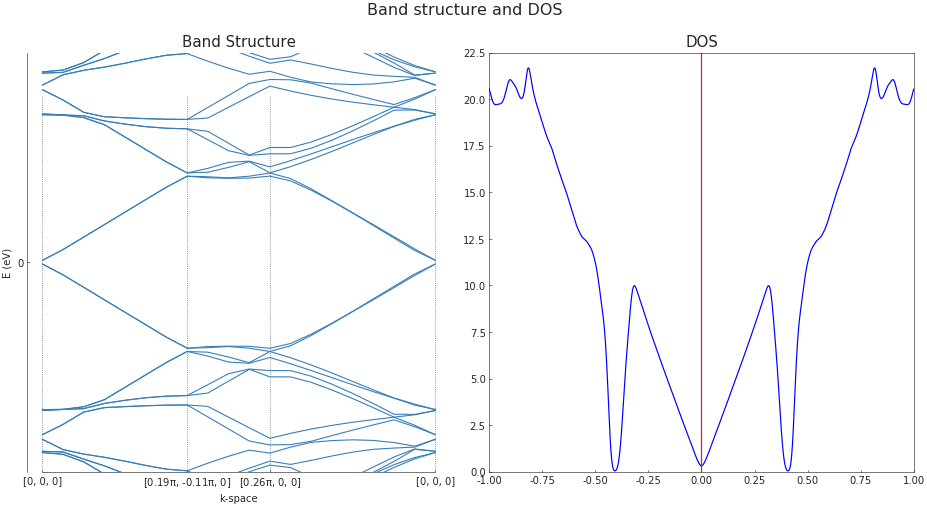

In [5]:
##DOS (using brillouing zone)
E = 1

f, axs = plt.subplots(1,2,figsize=(13,7))
f.suptitle("Band structure and DOS", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.88)

#Band Structure
ax1 = plt.subplot(121)
ax1.set_title('Band Structure',fontsize=15)
solver = pb.solver.lapack(model)
bands = solver.calc_bands(gamma,MM,KK,gamma)
bands.plot()
ylim=1
plt.ylim(-ylim, ylim)

#DOS
ax2 = plt.subplot(122)
ax2.set_title('DOS',fontsize=15)
solver.set_wave_vector([0,0])
lapack_dos = solver.calc_dos(np.linspace(-E, E, 2500), broadening=0.01)
data2=lapack_dos.data
for i in range(0,kk1):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-E, E, 2500), broadening=0.01)
    data2+=lapack_dos.data
data2=data2/(kk1+1)

plt.plot(np.linspace(-E, E, 2500),data2,label='position: [4.5,3]',color='b')
#plt.plot(data2, np.linspace(-ylim,ylim,2500))
plt.axvline(0)

# Graphene with potential (circle)

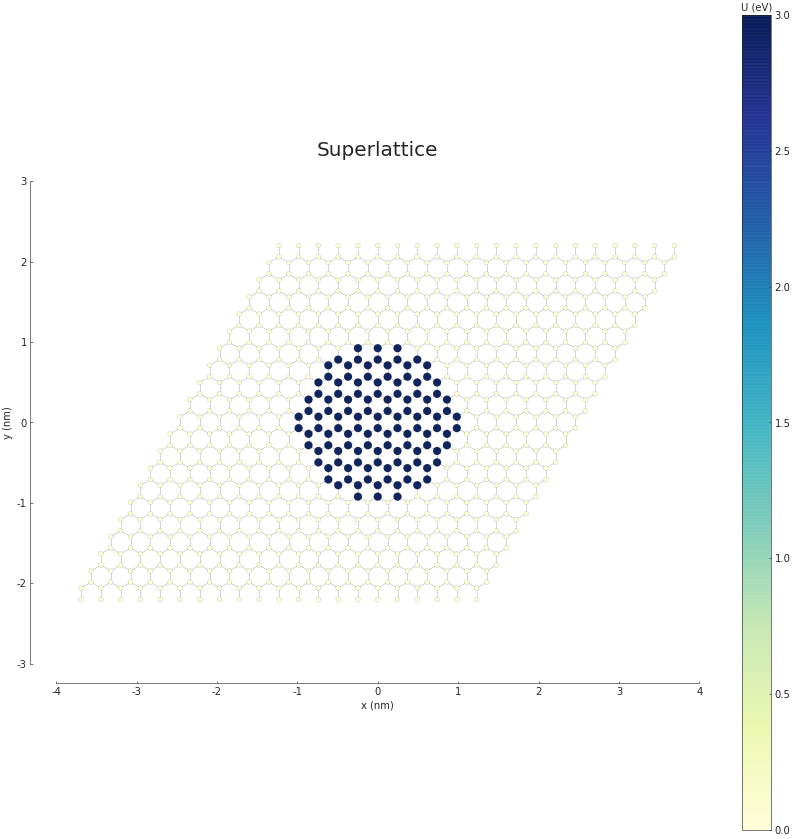

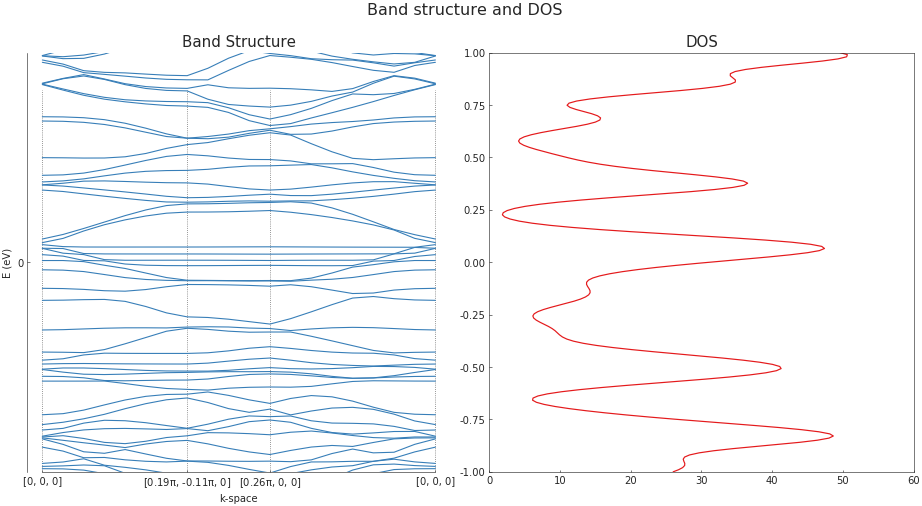

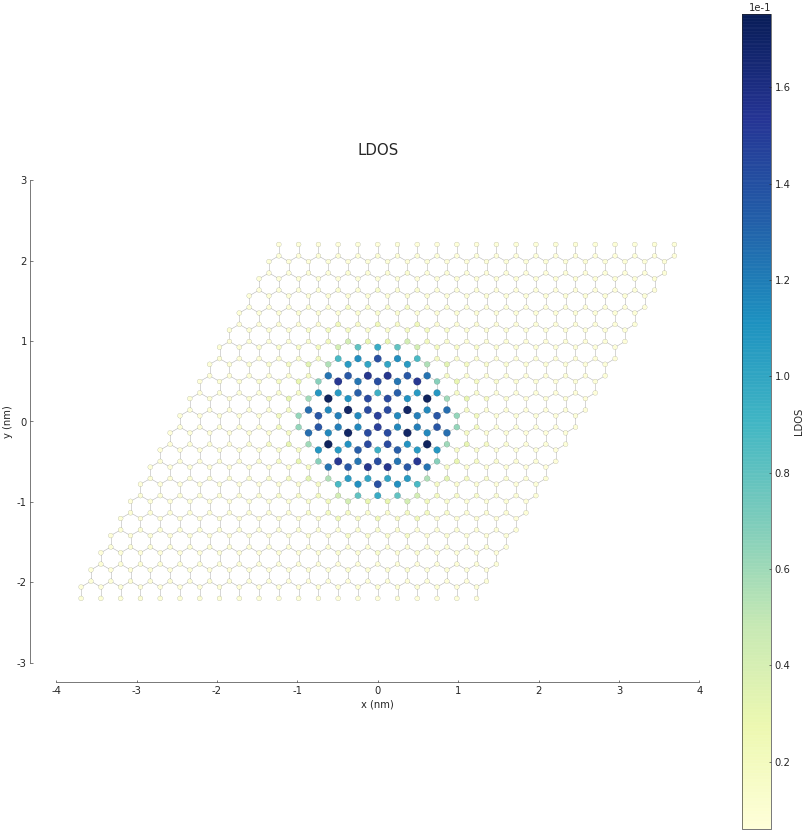

In [6]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from pybinding.repository import graphene
from math import pi, sqrt
pb.pltutils.use_style()
%matplotlib inline

##Use formula to find reciprocal vectors
def reci(A1,A2):
    c = np.array([0,0,1])
    V = abs(np.dot(np.cross(A1,A2),c))
    B1 = 2*np.pi*np.cross(A2,c)/V
    B2 = 2*np.pi*np.cross(c,A1)/V
    return [B1,B2]
    
##Number of graphenes
a=21
b=a


@pb.onsite_energy_modifier
def potential(energy, x, y):
        energy[x**2+y**2<1] = 3
        energy[x**2+y**2>1] = 0
        return energy

model = pb.Model(graphene.monolayer(),
                 pb.primitive(a1=a, a2=b),
                 pb.translational_symmetry(a1=a*graphene.a, a2=b*graphene.a),
                 potential
                )

plt.figure(figsize=(15,15))
plt.title('Superlattice',fontsize=20)
model.onsite_map.plot(num_periods=0)
pb.pltutils.colorbar(label="U (eV)")

## Gamma, M, K path in brillouin zone
A1,A2 = model.lattice.vectors
A1,A2 = A1*a,A2*b
B1,B2 = reci(A1,A2)
BB = B1+B2
KK = (B1+BB)*(1/3)
MM = B1*0.5
gamma = np.zeros(3,dtype=float)

f, axs = plt.subplots(1,2,figsize=(13,7))
f.suptitle("Band structure and DOS", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.88)

#Band Structure
ax1 = plt.subplot(121)
ax1.set_title('Band Structure',fontsize=15)
solver = pb.solver.lapack(model)
bands = solver.calc_bands(gamma,MM,KK,gamma)
bands.plot()
ylim=1
plt.ylim(-ylim, ylim)


#DOS
ax2 = plt.subplot(122)
ax2.set_title('DOS',fontsize=15)
solver = pb.solver.lapack(model)
dos = solver.calc_dos(energies=np.linspace(-ylim, ylim, 200), broadening=0.05)  # [eV]
plt.plot(dos.data, np.linspace(-ylim,ylim,200))

#LDOS
plt.figure(figsize=(15,15))
plt.title('LDOS',fontsize=15)
solver = pb.solver.lapack(model)
ldos_map = solver.calc_spatial_ldos(energy=0, broadening=0.2)  # [eV]
ldos_map.plot(num_periods=0)
pb.pltutils.colorbar(label="LDOS")

# DOS with more k-point

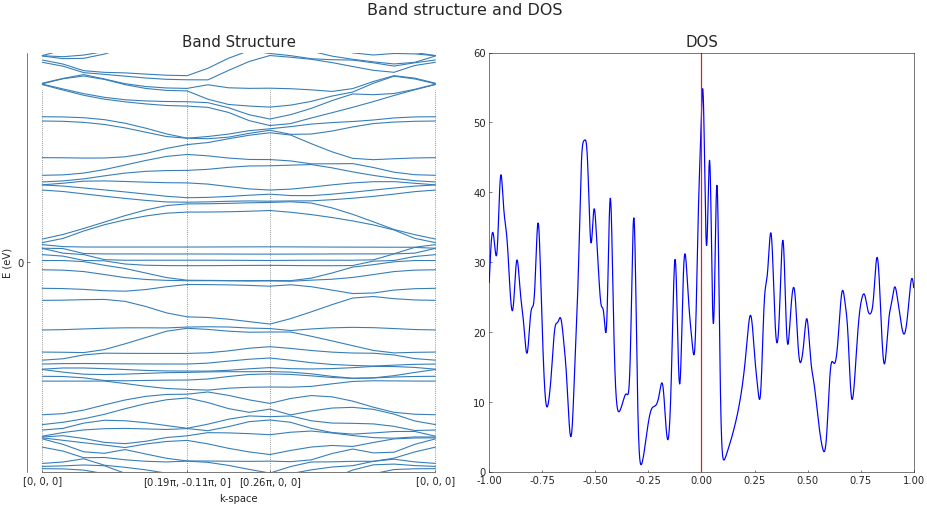

In [7]:
##DOS (using brillouing zone)
E = 1

f, axs = plt.subplots(1,2,figsize=(13,7))
f.suptitle("Band structure and DOS", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.88)

#Band Structure
ax1 = plt.subplot(121)
ax1.set_title('Band Structure',fontsize=15)
solver = pb.solver.lapack(model)
bands = solver.calc_bands(gamma,MM,KK,gamma)
bands.plot()
ylim=1
plt.ylim(-ylim, ylim)

#DOS
ax2 = plt.subplot(122)
ax2.set_title('DOS',fontsize=15)
solver.set_wave_vector([0,0])
lapack_dos = solver.calc_dos(np.linspace(-E, E, 2500), broadening=0.01)
data2=lapack_dos.data
for i in range(0,kk1):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-E, E, 2500), broadening=0.01)
    data2+=lapack_dos.data
data2=data2/(kk1+1)

plt.plot(np.linspace(-E, E, 2500),data2,label='position: [4.5,3]',color='b')
#plt.plot(data2, np.linspace(-ylim,ylim,2500))
plt.axvline(0)

# Graphen with potential (sin)

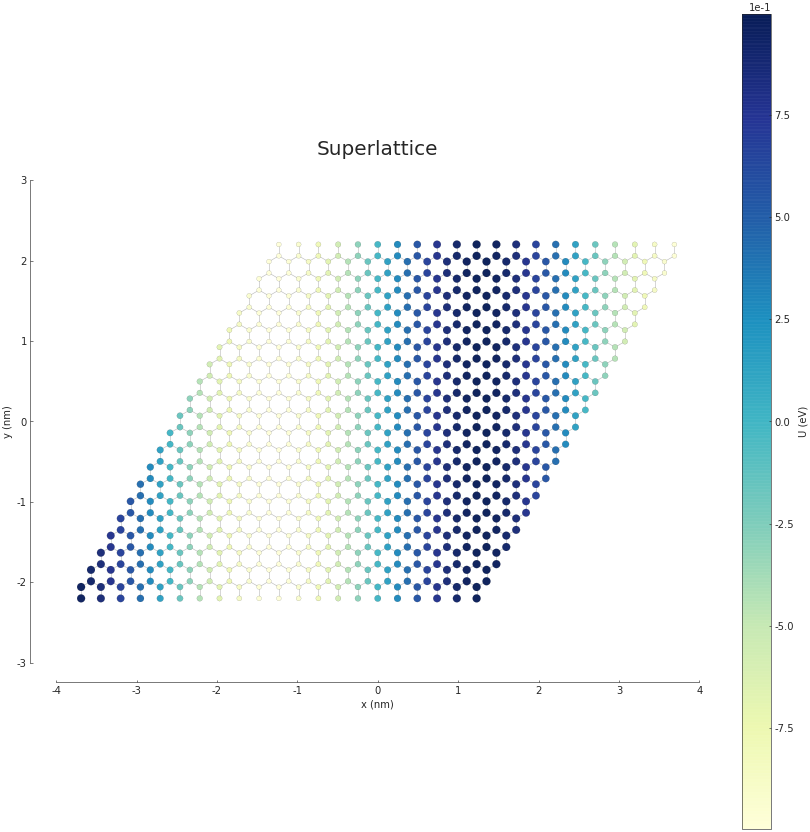

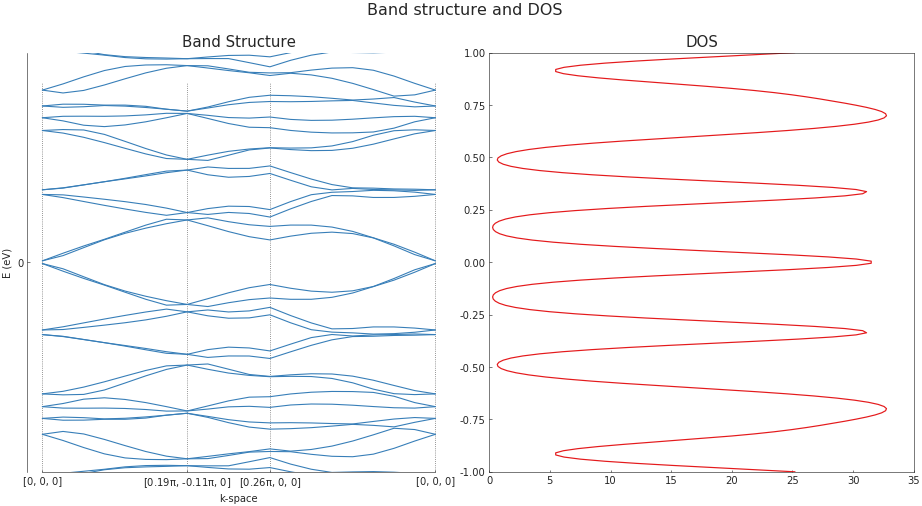

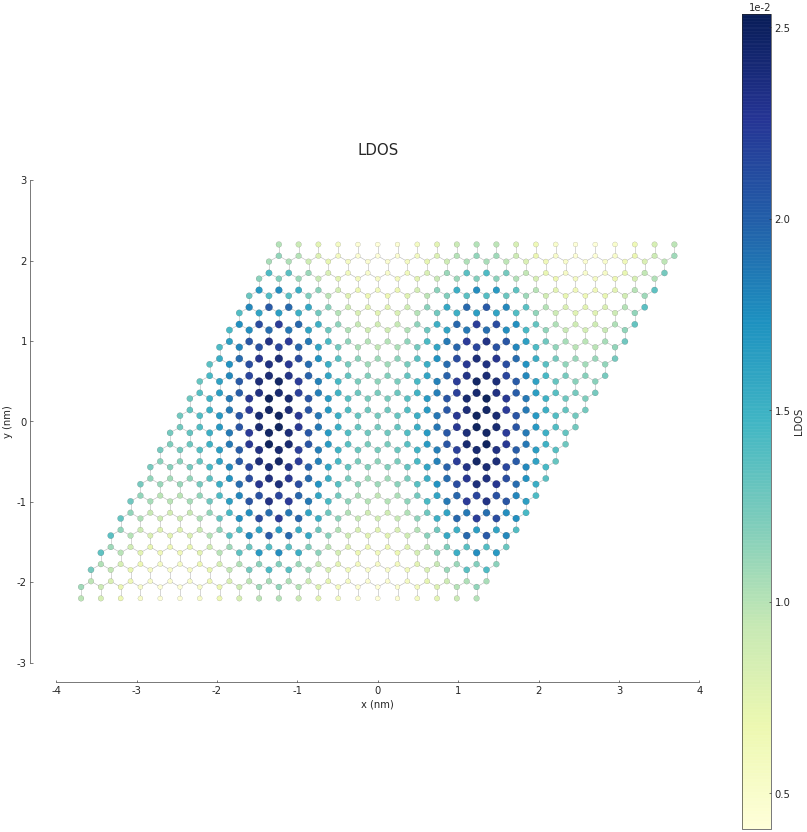

In [8]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from pybinding.repository import graphene
from math import pi, sqrt
pb.pltutils.use_style()
%matplotlib inline

##Use formula to find reciprocal vectors
def reci(A1,A2):
    c = np.array([0,0,1])
    V = abs(np.dot(np.cross(A1,A2),c))
    B1 = 2*np.pi*np.cross(A2,c)/V
    B2 = 2*np.pi*np.cross(c,A1)/V
    return [B1,B2]
    
##Number of graphenes
a=21
b=a


@pb.onsite_energy_modifier
def potential(x, y):
        return np.sin(2*pi*x/(a*graphene.a))

model = pb.Model(graphene.monolayer(),
                 pb.primitive(a1=a, a2=b),
                 pb.translational_symmetry(a1=a*graphene.a, a2=b*graphene.a),
                 potential
                )

plt.figure(figsize=(15,15))
plt.title('Superlattice',fontsize=20)
model.onsite_map.plot(num_periods=0)
pb.pltutils.colorbar(label="U (eV)")

## Gamma, M, K path in brillouin zone
A1,A2 = model.lattice.vectors
A1,A2 = A1*a,A2*b
B1,B2 = reci(A1,A2)
BB = B1+B2
KK = (B1+BB)*(1/3)
MM = B1*0.5
gamma = np.zeros(3,dtype=float)

f, axs = plt.subplots(1,2,figsize=(13,7))
f.suptitle("Band structure and DOS", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.88)

#Band Structure
ax1 = plt.subplot(121)
ax1.set_title('Band Structure',fontsize=15)
solver = pb.solver.lapack(model)
bands = solver.calc_bands(gamma,MM,KK,gamma)
bands.plot()
ylim=1
plt.ylim(-ylim, ylim)


#DOS
ax2 = plt.subplot(122)
ax2.set_title('DOS',fontsize=15)
solver = pb.solver.lapack(model)
dos = solver.calc_dos(energies=np.linspace(-ylim, ylim, 200), broadening=0.05)  # [eV]
plt.plot(dos.data, np.linspace(-ylim,ylim,200))

#LDOS
plt.figure(figsize=(15,15))
plt.title('LDOS',fontsize=15)
solver = pb.solver.lapack(model)
ldos_map = solver.calc_spatial_ldos(energy=0, broadening=0.2)  # [eV]
ldos_map.plot(num_periods=0)
pb.pltutils.colorbar(label="LDOS")

# DOS with more k-point

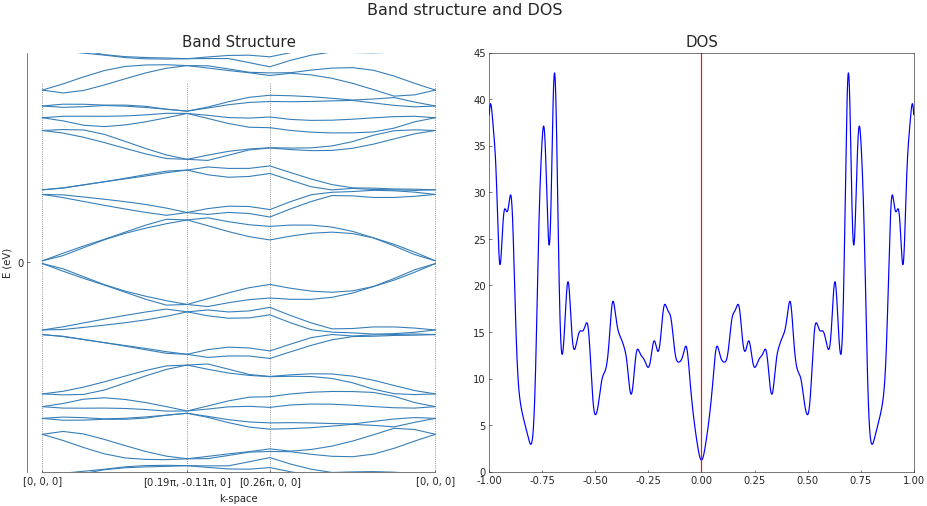

In [9]:
##DOS (using brillouing zone)
E = 1

f, axs = plt.subplots(1,2,figsize=(13,7))
f.suptitle("Band structure and DOS", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.88)

#Band Structure
ax1 = plt.subplot(121)
ax1.set_title('Band Structure',fontsize=15)
solver = pb.solver.lapack(model)
bands = solver.calc_bands(gamma,MM,KK,gamma)
bands.plot()
ylim=1
plt.ylim(-ylim, ylim)

#DOS
ax2 = plt.subplot(122)
ax2.set_title('DOS',fontsize=15)
solver.set_wave_vector([0,0])
lapack_dos = solver.calc_dos(np.linspace(-E, E, 2500), broadening=0.01)
data2=lapack_dos.data
for i in range(0,kk1):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-E, E, 2500), broadening=0.01)
    data2+=lapack_dos.data
data2=data2/(kk1+1)

plt.plot(np.linspace(-E, E, 2500),data2,label='position: [4.5,3]',color='b')
#plt.plot(data2, np.linspace(-ylim,ylim,2500))
plt.axvline(0)